## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [225]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

In [226]:
# Import data from csv
lego_set = pd.read_csv('datasets/lego_sets.csv')
parent_theme = pd.read_csv('datasets/parent_themes.csv')

## Understand lego_set data

In [227]:
lego_set.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [228]:
lego_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


There's missing values at columns: set_num, name, num_parts, theme_name. However, missing values in num_parts are acceptable so we keep it that way. For the other columns, we'll remove the missing values in set_num columns because the rows are duplicate or invalid.

In [229]:
# Remove missing values
lego_set = lego_set[lego_set['set_num'].notnull()]

In [230]:
# Check if the missing values is removed
lego_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11833 entries, 0 to 11832
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11833 non-null  int64  
 3   num_parts     6835 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11833 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 647.1+ KB


### Lego Year Production

Now we want to check how much lego was producted in years

In [231]:
# Count year values
lego_set['year'].value_counts()

2014    715
2015    670
2012    615
2016    608
2013    593
       ... 
1965     10
1950      7
1953      4
1959      4
1960      3
Name: year, Length: 66, dtype: int64

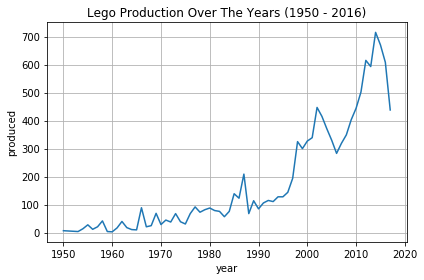

In [232]:
# Define variable for plot line graph
lego_year_prod = pd.DataFrame(lego_set['year'].value_counts()).rename(columns={'year': 'Produced'}).sort_index(ascending=False)

# Plot
_ = plt.plot(lego_year_prod)
_ = plt.xlabel('year')
_ = plt.ylabel('produced')
_ = plt.title('Lego Production Over The Years (1950 - 2016)')
_ = plt.grid(True)

plt.show()

### Quick Analysis

As we can see that lego production is increasing over the years in overall. There's some spikes production at around 1987, 1995 - 2003. There's also some production decline at around 2006 and 2015. 

We can tell that each values in data set is unique (because there's set_num columns that differentiate each values in data), so there will be no duplicate data in each row and each data is unique so it is safe to do this analysis.

## Understand parent_theme data

In [233]:
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [234]:
parent_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


In [235]:
# Get all licensed parent theme
lic_theme = parent_theme[parent_theme['is_licensed'] == True]

# Filter lego_set with license theme
lego_lic = lego_set[lego_set['parent_theme'].isin(lic_theme['name'])]

In [236]:
# Check if the licensed theme is same on lego_set and parent_theme data
print(np.sort(lego_lic['parent_theme'].unique()))
print(lic_theme['name'].sort_values())

['Angry Birds' 'Avatar' 'Ben 10' 'Cars' 'Disney' 'Disney Princess'
 "Disney's Mickey Mouse" 'Ghostbusters' 'Harry Potter' 'Indiana Jones'
 'Jurassic World' 'Minecraft' 'Pirates of the Caribbean'
 'Prince of Persia' 'Scooby-Doo' 'SpongeBob SquarePants' 'Star Wars'
 'Super Heroes' 'Teenage Mutant Ninja Turtles'
 'The Hobbit and Lord of the Rings' 'The Lone Ranger' 'Toy Story']
107                         Angry Birds
33                               Avatar
19                               Ben 10
18                                 Cars
109                              Disney
95                      Disney Princess
43                Disney's Mickey Mouse
108                        Ghostbusters
12                         Harry Potter
17                        Indiana Jones
103                      Jurassic World
93                            Minecraft
16             Pirates of the Caribbean
20                     Prince of Persia
104                          Scooby-Doo
21                Spon

In [237]:
# What percentage of all licensed sets ever released were Star Wars themed?
the_force = int((len(lego_lic[lego_lic['parent_theme'] == 'Star Wars']) / len(lego_lic)) * 100)
print(the_force)

51


In [238]:
# In which year was Star Wars not the most popular 
# licensed theme (in terms of number of sets released that year)?

sw_lego = lego_lic[lego_lic['parent_theme'] == 'Star Wars']

In [239]:
sw_lego['year'].value_counts()

2016    61
2015    58
2017    55
2014    45
2012    43
2009    39
2013    35
2003    32
2011    32
2010    30
2002    28
2005    28
2000    26
2008    23
2004    20
2007    16
2001    14
1999    13
2006    11
Name: year, dtype: int64

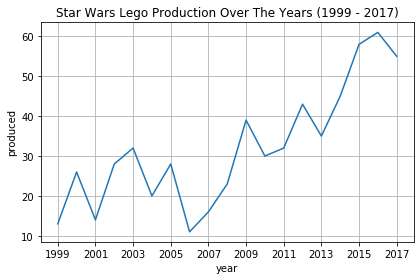

In [240]:
# Define variable for plot line graph
sw_lego_year = pd.DataFrame(sw_lego['year'].value_counts()).rename(columns={'year': 'Produced'}).sort_index(ascending=False)

# Plot
_ = plt.plot(sw_lego_year)
_ = plt.xlabel('year')

xticks(np.arange(min(sw_lego['year'].value_counts().index), 
                     max(sw_lego['year'].value_counts().index)+2,
                     step=2)) #Set xticks label

_ = plt.ylabel('produced')
_ = plt.title('Star Wars Lego Production Over The Years (1999 - 2017)')
_ = plt.grid(True)

plt.show()

In [241]:
new_era = 2017
print(new_era)

2017
